<a href="https://colab.research.google.com/github/haaris519/Get-Started-with-Python-Google/blob/main/Content_Smart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Record_ID                Date          Location  Traffic_Flow  \
0          1 2023-01-01 00:00:00   Industrial Zone          3581   
1          2 2023-01-01 01:00:00       School Zone          4501   
2          3 2023-01-01 02:00:00  Residential Area          2985   
3          4 2023-01-01 03:00:00       School Zone          3926   
4          5 2023-01-01 04:00:00       School Zone           176   

  Congestion_Level  Accidents_Reported Weather_Condition  Average_Speed_kmph  \
0              Low                   2             Snowy               81.96   
1           Severe                   4             Windy               79.96   
2         Moderate                   2             Windy               70.63   
3           Severe                   2             Clear               55.04   
4              Low                   1             Foggy              111.29   

   Traffic_Signal_Delay_sec  
0                       103  
1                       102  
2                   

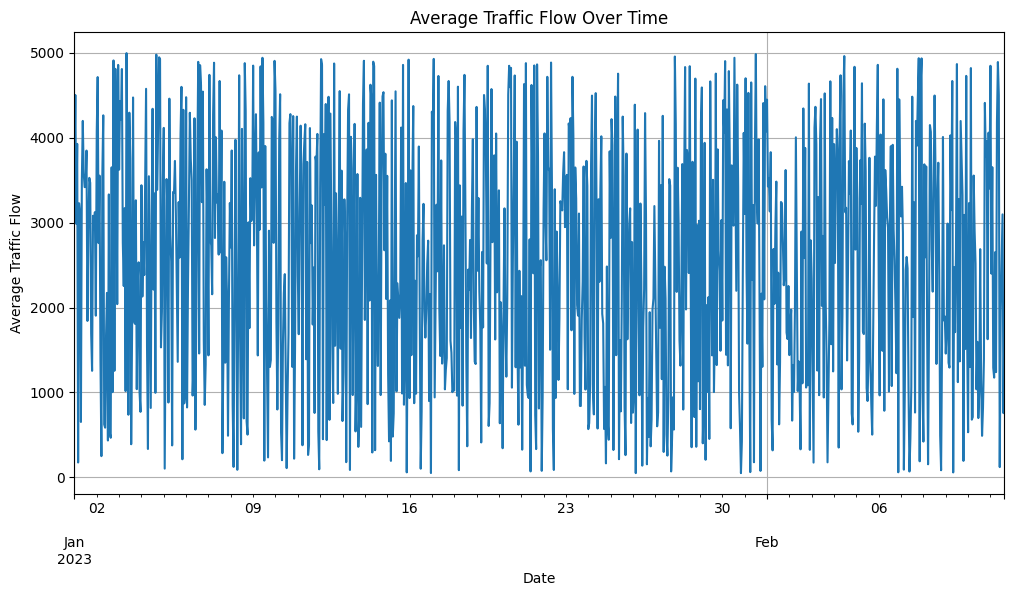

<ipython-input-3-765208d86503>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Congestion_Level', data=df, palette='Set2')


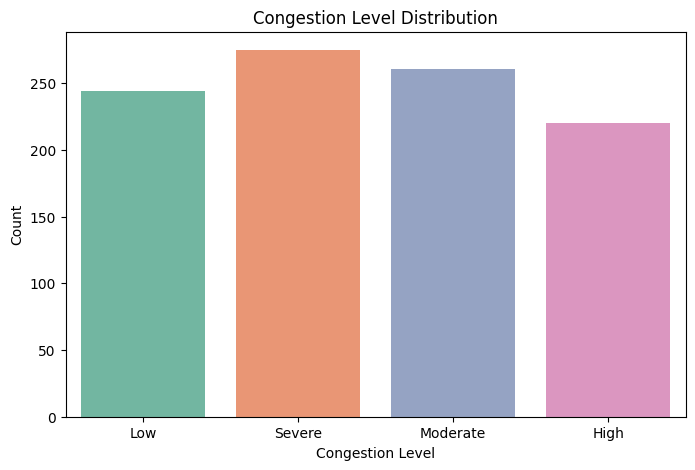

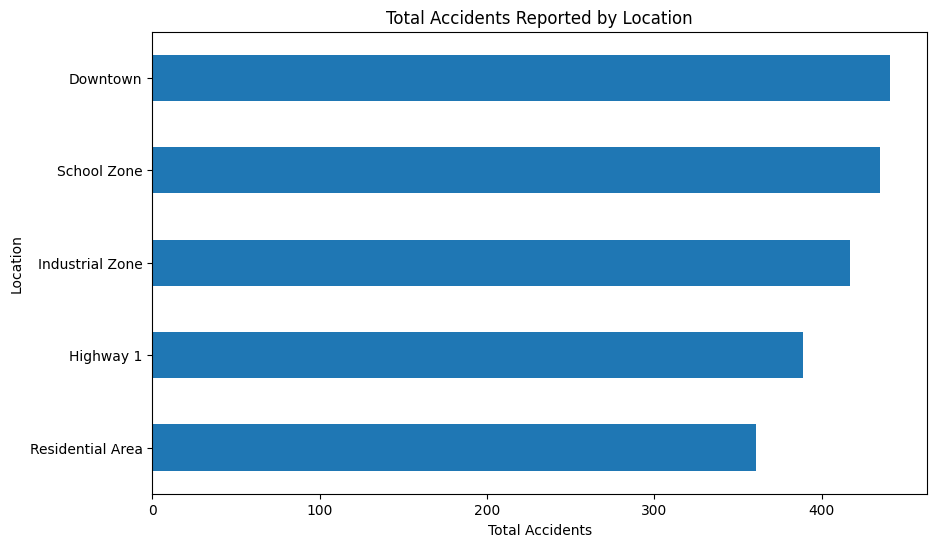

<ipython-input-3-765208d86503>:40: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  traffic_ts = df.set_index('Date')['Traffic_Flow'].resample('D').mean().fillna(method='ffill')


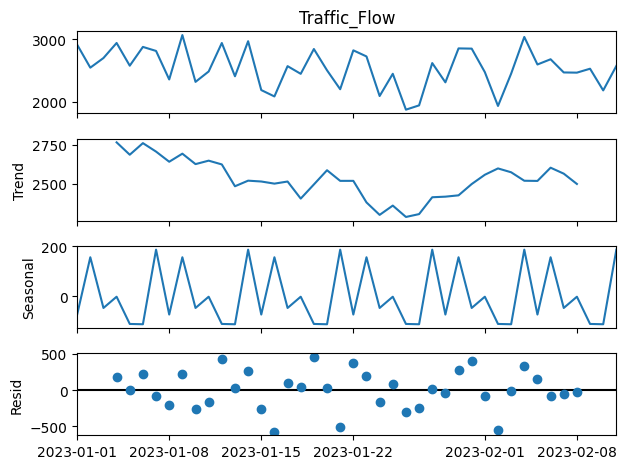

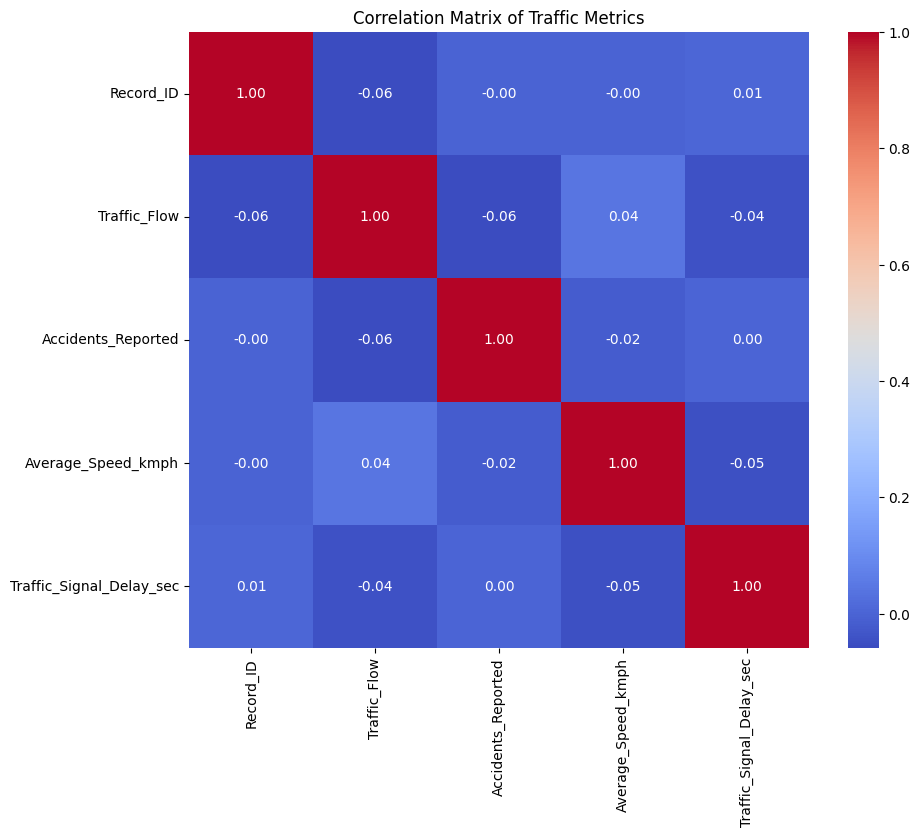


Congestion Hotspots:
 Location
Residential Area    2680.889474
Highway 1           2586.021053
School Zone         2546.254902
Industrial Zone     2485.194175
Downtown            2407.904762
Name: Traffic_Flow, dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = '/content/smart_city_traffic_data.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'])

print(df.head())
print(df.info())
print(df.describe())

print("Missing Values:\n", df.isnull().sum())

plt.figure(figsize=(12, 6))
df.groupby('Date')['Traffic_Flow'].mean().plot()
plt.title('Average Traffic Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Average Traffic Flow')
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Congestion_Level', data=df, palette='Set2')
plt.title('Congestion Level Distribution')
plt.xlabel('Congestion Level')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
df.groupby('Location')['Accidents_Reported'].sum().sort_values().plot(kind='barh')
plt.title('Total Accidents Reported by Location')
plt.xlabel('Total Accidents')
plt.ylabel('Location')
plt.show()

# Time Series Decomposition
traffic_ts = df.set_index('Date')['Traffic_Flow'].resample('D').mean().fillna(method='ffill')

result = seasonal_decompose(traffic_ts, model='additive')
result.plot()
plt.show()

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Traffic Metrics')
plt.show()

hotspots = df.groupby('Location')['Traffic_Flow'].mean().sort_values(ascending=False)
print("\nCongestion Hotspots:\n", hotspots.head())